# **Import Libraries**

In [1]:
import numpy as np 
import pandas as pd
import sklearn.datasets
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , precision_score,confusion_matrix

%matplotlib inline

In [2]:
import sys
sys.path.append('/kaggle/input/breast-cancer-dataset/breast cancer dataset.csv')

# **Data Collection & Processing**

In [3]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [4]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
Datapath=('/kaggle/input/breast-cancer-dataset/breast cancer dataset.csv')
data=pd.read_csv(Datapath)

In [6]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
# print the first 5 rows of the dataframe
data_frame.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


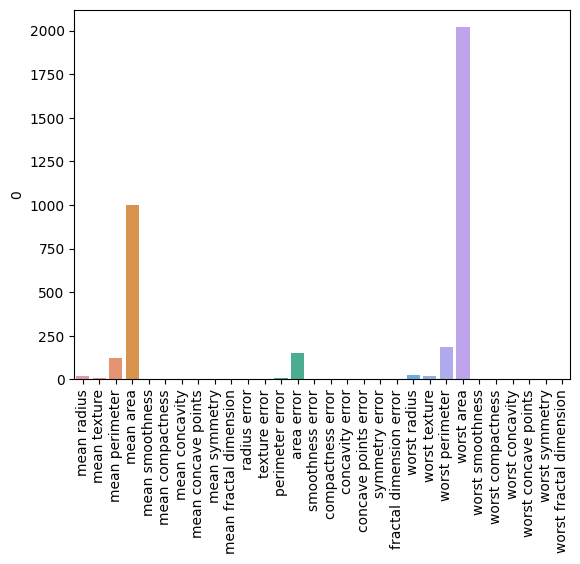

In [7]:
sns.barplot(x=data_frame.columns, y=data_frame.iloc[0])
plt.xticks(rotation=90)
plt.show()

# **Separating the features and target**

In [8]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target
# print last 5 rows of the dataframe
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [9]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


# **Model Training**

In [10]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, Y):
    return accuracy_score(Y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18),
    "Logistic Regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier()
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, Y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.89473684 0.84210526 0.89473684 0.92982456 0.92982456 0.92982456
 0.94736842 0.92982456 0.92982456 0.91071429]
Mean Score: 0.9138784461152882
Gaussian NB
Scores: [0.94736842 0.87719298 0.89473684 0.92982456 0.94736842 0.96491228
 0.92982456 0.96491228 0.94736842 0.96428571]
Mean Score: 0.9367794486215537
Random Forest
Scores: [0.98245614 0.89473684 0.92982456 0.94736842 0.98245614 0.98245614
 0.94736842 0.98245614 0.94736842 1.        ]
Mean Score: 0.9596491228070174
Logistic Regression
Scores: [0.92982456 0.94736842 0.92982456 0.94736842 0.94736842 0.96491228
 0.92982456 0.92982456 0.96491228 0.96428571]
Mean Score: 0.9455513784461151


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

KNN
Scores: [0.9122807  0.87719298 0.89473684 0.96491228 0.94736842 0.92982456
 0.96491228 0.92982456 0.9122807  0.96428571]
Mean Score: 0.9297619047619046


# **Model Evaluation**

Accuracy on train data by SVM Classifier: 92.52747252747253
Accuracy on test data by SVM Classifier: 90.35087719298247


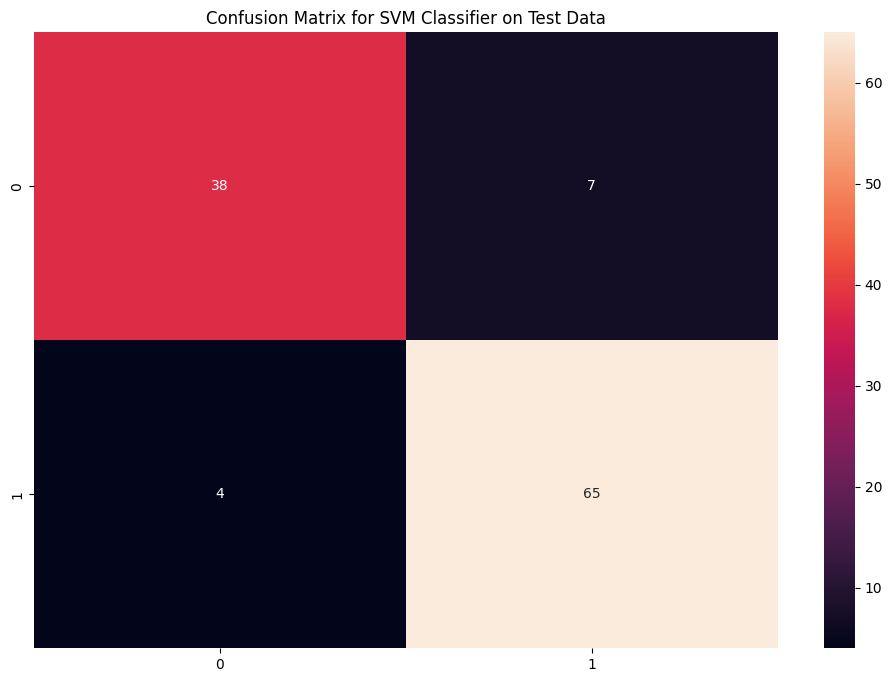

Accuracy on train data by Naive Bayes Classifier: 93.62637362637362
Accuracy on test data by Naive Bayes Classifier: 93.85964912280701


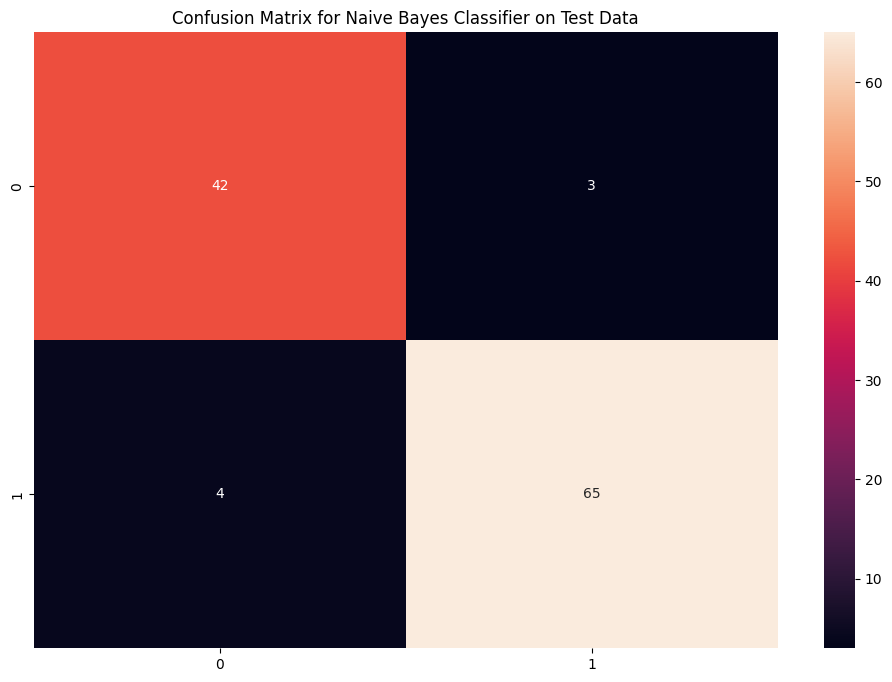

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 94.73684210526315


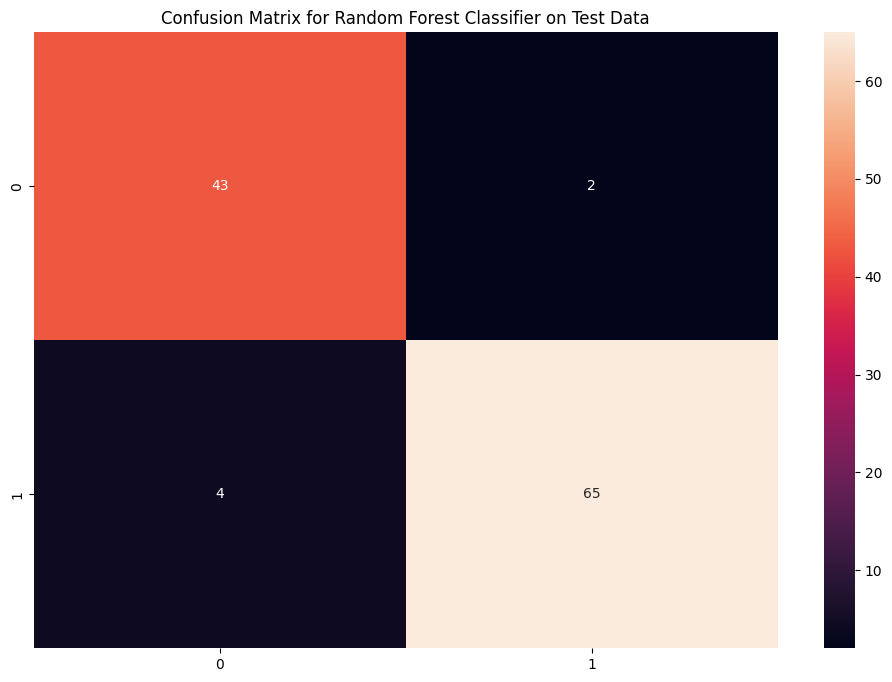

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on train data by Logistic Regression: 94.94505494505493
Accuracy on test data by Logistic Regression: 92.10526315789474


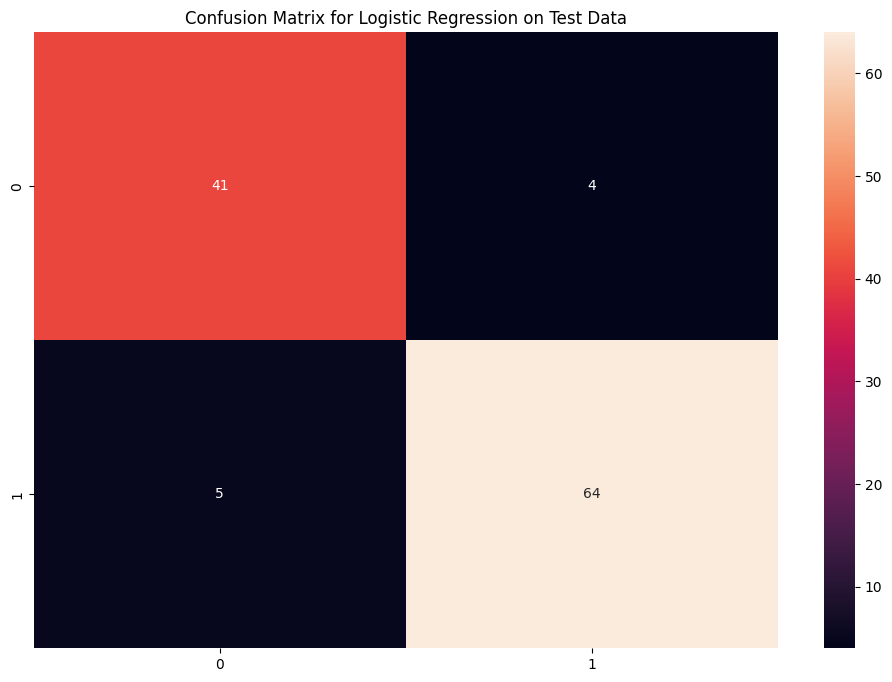

Accuracy on train data by KNN: 95.38461538461539
Accuracy on test data by KNN: 91.22807017543859


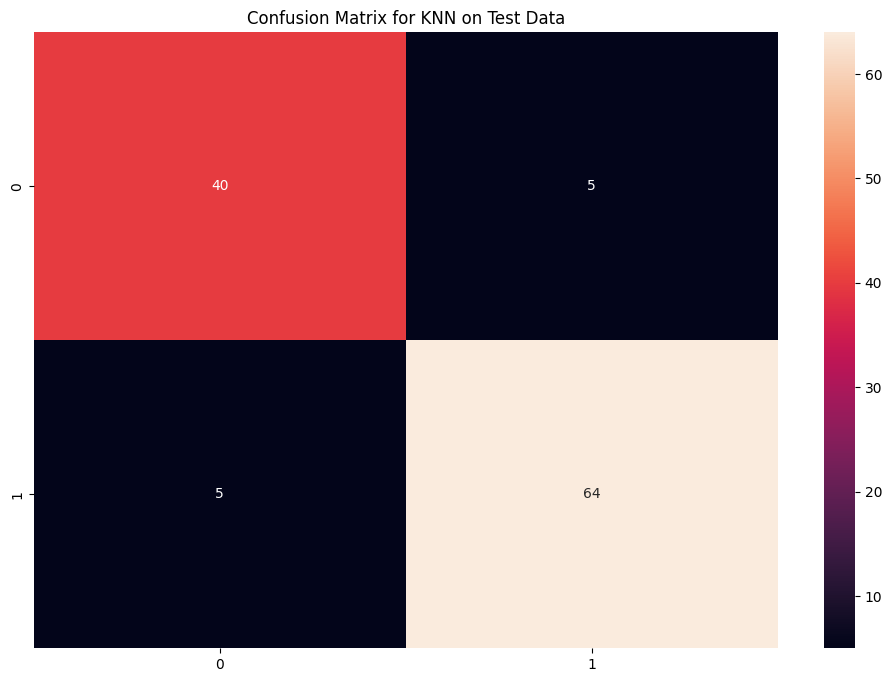

In [11]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, Y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(Y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(Y_test, preds)*100}")
cf_matrix = confusion_matrix(Y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(Y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(Y_test, preds)*100}")
cf_matrix = confusion_matrix(Y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, Y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(Y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(Y_test, preds)*100}")
cf_matrix = confusion_matrix(Y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

# Training and testing Logistic Regression
lg_model = LogisticRegression()
lg_model.fit(X_train, Y_train)
preds = lg_model.predict(X_test)
print(f"Accuracy on train data by Logistic Regression\
: {accuracy_score(Y_train, lg_model.predict(X_train))*100}")

print(f"Accuracy on test data by Logistic Regression\
: {accuracy_score(Y_test, preds)*100}")
cf_matrix = confusion_matrix(Y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Logistic Regression on Test Data")
plt.show()

# Training and testing KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
preds = knn_model.predict(X_test)
print(f"Accuracy on train data by KNN\
: {accuracy_score(Y_train, knn_model.predict(X_train))*100}")

print(f"Accuracy on test data by KNN\
: {accuracy_score(Y_test, preds)*100}")
cf_matrix = confusion_matrix(Y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for KNN on Test Data")
plt.show()


# **Building a Predictive System**

In [12]:
model.fit(X_train, Y_train) 

input_data = (13.54,14.36,87.46,566.3,0.08129,0.7866, 0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')



[1]
The Breast Cancer is Benign


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [13]:
import joblib

model.fit(X_train, Y_train)

# Save the trained model
joblib.dump(model, 'breast_cancer_model.pkl')


['breast_cancer_model.pkl']

In [32]:
!pip install Flask
!pip install joblib scikit-learn


# **Model training & evaluation on 5 features**

In [15]:
import pandas as pd

# Load the data into a DataFrame (assuming you have the breast cancer dataset)
data_frame = pd.read_csv("/kaggle/input/breast-cancer-dataset/breast cancer dataset.csv")  # Replace with your file path

# Specify the 5 important features based on domain knowledge
important_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concave points_mean']

# Extract the important features into a new DataFrame
selected_data_frame = data_frame[important_features]

# Print the first 5 rows of the new DataFrame with selected features
print(selected_data_frame.head())


   radius_mean  texture_mean  perimeter_mean  area_mean  concave points_mean
0        17.99         10.38          122.80     1001.0              0.14710
1        20.57         17.77          132.90     1326.0              0.07017
2        19.69         21.25          130.00     1203.0              0.12790
3        11.42         20.38           77.58      386.1              0.10520
4        20.29         14.34          135.10     1297.0              0.10430


In [21]:
# Now use this selected data for training your model
X_selected = selected_data_frame
Y = breast_cancer_dataset.target

# Split the data (for example)

X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

# Train your model as usual
model = SVC()
model.fit(X_train, Y_train)

# Make predictions and evaluate
preds = model.predict(X_test)

# Save the trained model
joblib.dump(model, 'breast_cancer.pkl')


['breast_cancer.pkl']